In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data preprocessing

Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

### Read data

In [293]:
df = pd.read_csv("data.csv")

In [294]:
df.iloc[:5, :10]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475


### Print out column names

In [295]:
col_names = list(df)
col_names

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

### Normalize data

In [296]:
from sklearn.preprocessing import Normalizer

In [297]:
arr = df.iloc[:,1:].to_numpy()  # bez kolumny "Bankrupt?"

# sklearn.preprocessing.Normalizer działa na wierszach, dlatego transponujemy arr
arr = np.swapaxes(arr, 0, 1)
normalizer = Normalizer().fit(arr)

arr_norm = normalizer.transform(arr)
arr_norm = np.swapaxes(arr_norm, 0, 1)

data_norm = pd.DataFrame(arr_norm, columns=col_names[1:])
data_norm.insert(0, "Bankrupt?", df.iloc[:,0])

In [298]:
data_norm.iloc[:,:20]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons
0,1,0.008820,0.009137,0.008821,0.011976,0.011976,0.012111,0.012104,0.012104,0.012063,0.012102,4.002606e-16,0.000000e+00,0.011861,8.018070e-14,0.000000,0.009256,0.009257,0.009255,0.008859
1,1,0.011050,0.011588,0.011234,0.012151,0.012151,0.012111,0.012111,0.012111,0.012099,0.012110,9.227720e-16,0.000000e+00,0.011958,7.155436e-14,0.000000,0.011402,0.011403,0.011401,0.010943
2,1,0.010141,0.010744,0.010268,0.011976,0.011974,0.012110,0.012096,0.012098,0.012038,0.012091,7.519155e-16,9.505286e-05,0.011871,8.736931e-14,0.000000,0.011131,0.011131,0.012118,0.009458
3,1,0.009516,0.009716,0.009952,0.011619,0.011620,0.012108,0.012105,0.012106,0.012091,0.012106,3.435540e-16,0.000000e+00,0.012057,4.965674e-14,0.000000,0.009646,0.009647,0.009645,0.010146
4,1,0.011068,0.011592,0.011355,0.011923,0.011923,0.012111,0.012111,0.012111,0.012096,0.012111,2.512438e-02,0.000000e+00,0.011981,7.586753e-14,0.000000,0.010480,0.010480,0.010478,0.011131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.011750,0.011615,0.011810,0.012036,0.012036,0.012112,0.012112,0.012112,0.012097,0.012111,4.809019e-16,1.677403e-02,0.012006,1.979634e-14,0.007621,0.010951,0.010952,0.010950,0.011344
6815,0,0.011309,0.011589,0.011396,0.011913,0.011914,0.012112,0.012112,0.012112,0.012098,0.012111,1.662222e-02,5.367691e-03,0.011961,2.621079e-14,0.024980,0.011344,0.011345,0.011343,0.011349
6816,0,0.011251,0.011492,0.011319,0.012155,0.012151,0.012112,0.012112,0.012112,0.012097,0.012111,7.990484e-16,3.873261e-16,0.012225,0.000000e+00,0.032996,0.016862,0.016863,0.016860,0.011047
6817,0,0.012049,0.012055,0.012046,0.012103,0.012104,0.012113,0.012113,0.012113,0.012097,0.012113,3.936326e-16,9.356184e-03,0.012327,2.333535e-14,0.012187,0.013351,0.013351,0.013349,0.011958


### Komentarz: 
Przy niektórych kolumnach (Operating Expense Rate, Interest-bearing debt interest rate) po normalizacji występują bardzo małe wartości, co nie jest możliwe w przypadku wskaźników finansowych, których wartości są zawarte głównie w przedziale [0; 1].

Po zbadaniu sprawy okazuje się, że w takich kolumn jest aż 23 i podano w nich wartości bezwzględne dla niektórych obserwacji.
Ze względu na ten fakt, nie ma sensu usuwać wierszy, w których występuje co najmniej jedna wartość bezwzględna w którejkolwiek kolumnie, gdyż musielibyśmy usunąć prawie wszystko (tak jak pokazywałem na zajęciach zostanie ok. 300 obserwacji z jednej klasy - nie będzie już co klasyfikować).

W związku z powyższym usuwamy te kolumny.

In [299]:
suspicious_cols = [' Operating Expense Rate',
                   ' Research and development expense rate',
                   ' Interest-bearing debt interest rate',
                   ' Revenue Per Share (Yuan ¥)',
                   ' Net Value Growth Rate',
                   ' Current Ratio',
                   ' Quick Ratio',
                   ' Total debt/Total net worth',
                   ' Accounts Receivable Turnover',
                   ' Average Collection Days',
                   ' Inventory Turnover Rate (times)',
                   ' Fixed Assets Turnover Frequency',
                   ' Revenue per person',
                   ' Allocation rate per person',
                   ' Quick Assets/Current Liability',
                   ' Cash/Current Liability',
                   ' Inventory/Current Liability',
                   ' Long-term Liability to Current Assets',
                   ' Current Asset Turnover Rate',
                   ' Quick Asset Turnover Rate',
                   ' Cash Turnover Rate',
                   ' Fixed Assets to Assets',
                   ' Total assets to GNP price'
                  ]
len(suspicious_cols)

23

In [300]:
names_subset = set(col_names).difference(set(suspicious_cols))
names_subset.remove(' Total Asset Growth Rate')  # the majority of observations have absolute values
names_subset.remove(' Net Income Flag')  # all observations have vlaue=1

df_bool = df[list(names_subset)] < 1000
df_clean = df[list(names_subset)][df_bool.all(axis=1)]
df_clean  # data without normailizng

,Equity to Liability,Total expense/Assets,CFO to Assets,Tax rate (A),Equity to Long-term Liability,Net Income to Total Assets,Bankrupt?,Realized Sales Gross Margin,Operating Profit Rate,ROA(B) before interest and depreciation after tax,...,Cash Flow Per Share,Interest Expense Ratio,Operating Profit Growth Rate,Working Capital to Total Assets,Cash Flow to Total Assets,Net Value Per Share (A),Current Liabilities/Equity,After-tax Net Profit Growth Rate,Net Income to Stockholder's Equity,ROA(A) before interest and % after tax
0,0.016469,0.064856,0.520382,0.000000,0.126549,0.716845,1,0.601457,0.998969,0.405750,...,0.311664,0.629951,0.848195,0.672775,0.637555,0.147950,0.339077,0.688979,0.827890,0.424389
1,0.020794,0.025516,0.567101,0.000000,0.120916,0.795297,1,0.610235,0.998946,0.516730,...,0.318137,0.635172,0.848088,0.751111,0.641100,0.182251,0.329740,0.689693,0.839969,0.538214
2,0.016474,0.021387,0.538491,0.000000,0.117922,0.774670,1,0.601364,0.998857,0.472295,...,0.307102,0.629631,0.848094,0.829502,0.642765,0.177911,0.334777,0.689463,0.836774,0.499019
3,0.023982,0.024161,0.604105,0.000000,0.120760,0.739555,1,0.583541,0.998700,0.457733,...,0.321674,0.630228,0.848005,0.725754,0.579039,0.154187,0.331509,0.689110,0.834697,0.451265
4,0.035490,0.026385,0.578469,0.000000,0.110933,0.795016,1,0.598783,0.998973,0.522298,...,0.319162,0.636055,0.848258,0.751822,0.622374,0.167502,0.330726,0.689697,0.839973,0.538432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.029890,0.019060,0.587178,0.113372,0.112622,0.799927,0,0.604462,0.998992,0.543230,...,0.320966,0.631415,0.848205,0.817769,0.639806,0.175045,0.330914,0.689778,0.840359,0.539468
6815,0.038284,0.011118,0.569498,0.371596,0.112329,0.799748,0,0.598308,0.998992,0.524172,...,0.318278,0.631489,0.848245,0.793387,0.642072,0.181324,0.329753,0.689734,0.840306,0.538269
6816,0.097649,0.035446,0.589341,0.490839,0.110933,0.797778,0,0.610213,0.998984,0.520638,...,0.324857,0.630612,0.847978,0.866047,0.631678,0.269521,0.326921,0.689202,0.840138,0.533744
6817,0.044009,0.016443,0.678338,0.181294,0.110957,0.811808,0,0.607850,0.999074,0.554045,...,0.346573,0.630731,0.854064,0.832340,0.684857,0.213392,0.329294,0.696113,0.841084,0.559911


## Feature Selection

### print out new list of columns

In [301]:
col_names = list(df_clean_norm)
col_names

[' Equity to Liability',
 ' Total expense/Assets',
 ' CFO to Assets',
 ' Tax rate (A)',
 ' Equity to Long-term Liability',
 ' Net Income to Total Assets',
 'Bankrupt?',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' ROA(B) before interest and depreciation after tax',
 ' Cash/Total Assets',
 ' Liability to Equity',
 ' Total Asset Turnover',
 ' Total income/Total expense',
 ' Current Liabilities/Liability',
 ' Cash Flow to Sales',
 ' Inventory/Working Capital',
 ' Current Liability to Current Assets',
 ' Inventory and accounts receivable/Net value',
 ' Working Capital/Equity',
 ' Operating Funds to Liability',
 ' Current Liability to Liability',
 ' Net Value Per Share (C)',
 ' Continuous interest rate (after tax)',
 ' Total Asset Return Growth Rate Ratio',
 ' Working capitcal Turnover Rate',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Liability-Assets Flag',
 ' Operating profit/Paid-in capital',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Net Value Per Shar

### Komentarz:

Wiele z powyższych kolumn w pewnym stopniu powtarzają się (wskaźników ROA - 3 rodazje, net value per share - 3 rodzaje, dla niektórych wskaźników podano wartości przed i po opodatkowaniu), czyli nie wnoszą one dodatkowej wartości z punktu widzenia algorytmów uczenia maszynowego.

Dlatego planuję zagłębić temat co oznaczają poszczególne wskaźniki i na tej podstawie wybrać sensowny podzbior wskaźników, na których będę budował algorytmy ML. Poniżej jest beta wersja takiego podzbioru - są to cechy, które na pierwszy rzut oka wszystkie wnoszą istotny "kawałek" wiedzy i ta wiedza nie koliduje się z innymi wskaźnikami.

In [302]:
features_subset_demo = [' Cash Flow to Total Assets', ' Total Asset Turnover', ' Total expense/Assets', ' Debt ratio %',
                        ' Cash Reinvestment %', ' Net Income to Total Assets', ' Current Assets/Total Assets',
                       ' Cash Flow to Liability', ' Current Liabilities/Liability', ' Net worth/Assets', 
                        ' Quick Assets/Total Assets', ' Persistent EPS in the Last Four Seasons',
                       'Bankrupt?']
print(f"Liczba cech: {len(features_subset_demo) - 1}")

Liczba cech: 12


In [303]:
data_1 = df_clean[features_subset_demo]
data_1

,Cash Flow to Total Assets,Total Asset Turnover,Total expense/Assets,Debt ratio %,Cash Reinvestment %,Net Income to Total Assets,Current Assets/Total Assets,Cash Flow to Liability,Current Liabilities/Liability,Net worth/Assets,Quick Assets/Total Assets,Persistent EPS in the Last Four Seasons,Bankrupt?
0,0.637555,0.086957,0.064856,0.207576,0.363725,0.716845,0.190643,0.458609,0.676269,0.792424,0.166673,0.169141,1
1,0.641100,0.064468,0.025516,0.171176,0.376709,0.795297,0.182419,0.459001,0.308589,0.828824,0.127236,0.208944,1
2,0.642765,0.014993,0.021387,0.207516,0.368913,0.774670,0.602806,0.459254,0.446027,0.792484,0.340201,0.180581,1
3,0.579039,0.089955,0.024161,0.151465,0.384077,0.739555,0.225815,0.448518,0.615848,0.848535,0.161575,0.193722,1
4,0.622374,0.175412,0.026385,0.106509,0.379690,0.795016,0.358380,0.454411,0.975007,0.893491,0.260330,0.212537,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.639806,0.103448,0.019060,0.124618,0.380155,0.799927,0.578455,0.458639,0.786888,0.875382,0.312840,0.216602,0
6815,0.642072,0.103448,0.011118,0.099253,0.377389,0.799748,0.444043,0.459058,0.849898,0.900747,0.335085,0.216697,0
6816,0.631678,0.106447,0.035446,0.038939,0.379392,0.797778,0.496053,0.452465,0.553964,0.961061,0.476747,0.210929,0
6817,0.684857,0.109445,0.016443,0.086979,0.401028,0.811808,0.564439,0.471313,0.893241,0.913021,0.353624,0.228326,0


# 2. Try to balance data with oversampling

In [304]:
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i, y_list[i], y_list[i], size=16)

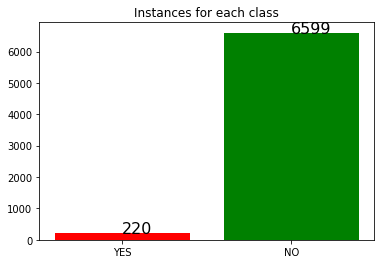

In [305]:
num_yes = len(data_1[data_1['Bankrupt?'] == 1])
num_no = len(data_1[data_1['Bankrupt?'] == 0])

plt.bar(['YES', 'NO'], [num_yes, num_no], color=['red', 'green'])
plt.title("Instances for each class")
add_value_label(['YES', 'NO'], [num_yes, num_no])

### Komentarz:
(bazując na tym źródle: https://www.openstarts.units.it/bitstream/10077/4002/1/Menardi%20Torelli%20DEAMS%20WPS2)

Bardzo ważne, jeśli korzystamy z oversamplingu, żeby stosować go jedynie do generowania danych treningowych. 
Dane testowe nie powinny zawierać sztucznych obserwacji, gdyż nie możemy mieć pewności, czy rzeczywiście odpowiadałyby one  jakimś instancjom w realnym świecie.

A zatem schemat Oversamplingu wygląda następująco:

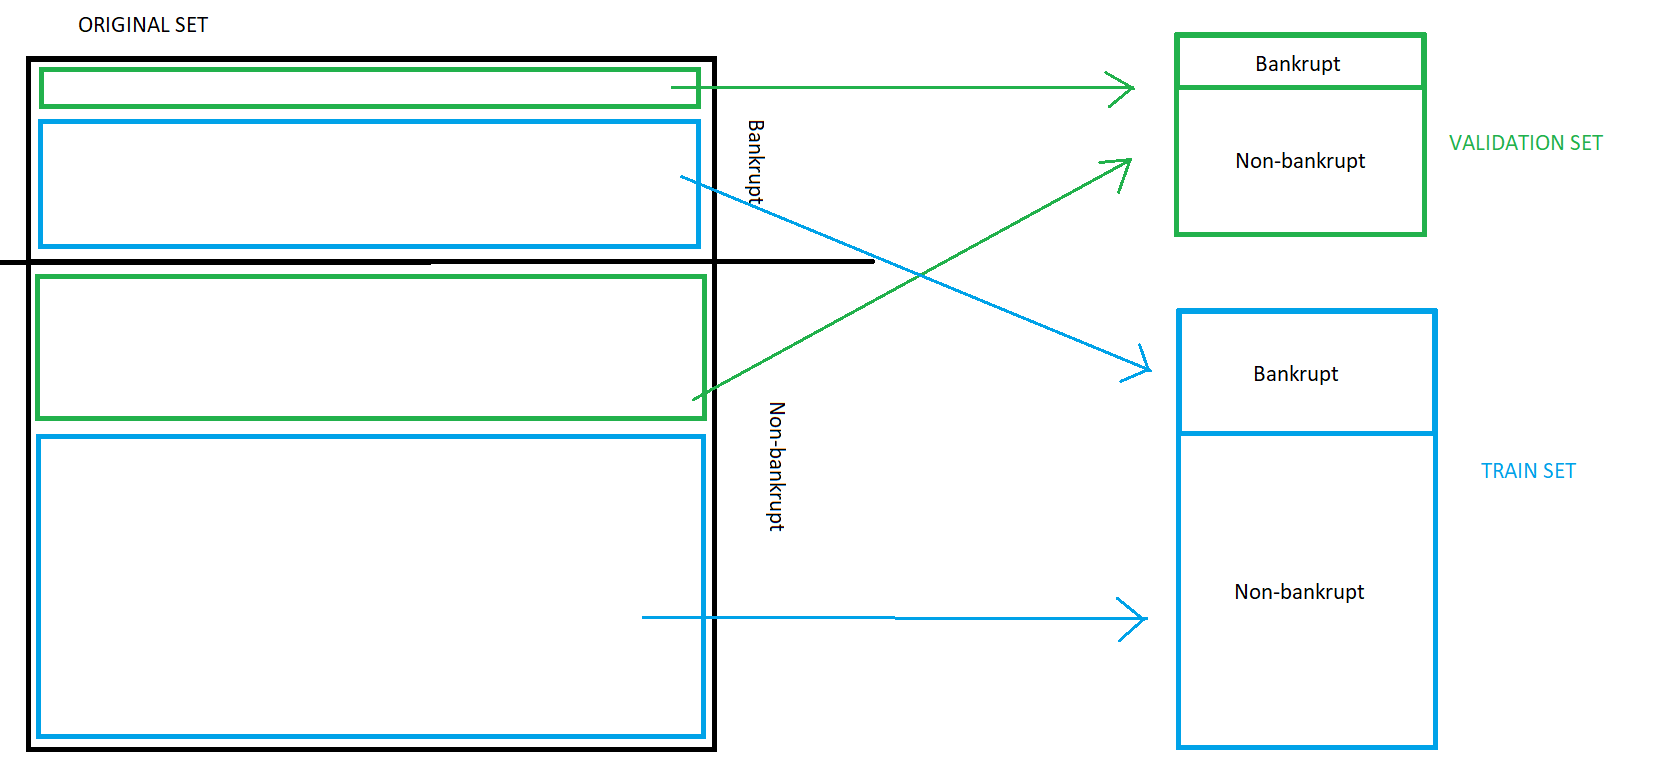

In [306]:
X = data_1.iloc[:,:-1].to_numpy()
Y = data_1.iloc[:,-1].to_numpy().reshape(len(data_1))

In [307]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from collections import Counter

### Split data

In [308]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) 
np.unique(Y_test, return_counts=True)[1]

array([1994,   52], dtype=int64)

## ROSE

In [309]:
rose = RandomOverSampler(random_state=31)
X_rose, Y_rose = rose.fit_resample(X_train, Y_train)
print(Counter(Y_rose))

Counter({0: 4605, 1: 4605})


## SMOTE

In [310]:
sm = SMOTE(random_state=42)
X_sm, Y_sm = sm.fit_resample(X_train, Y_train)
print(Counter(Y_sm))

Counter({0: 4605, 1: 4605})


## Training

In [311]:
from sklearn.ensemble import RandomForestClassifier

In [312]:
f1_scores = {}

### * Random Forest

In [313]:
print("\t\tRANDOM FOREST FOR ROSE")

rf_rose = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=6, random_state=35)
rf_rose.fit(X_rose, Y_rose)

y_pred = rf_rose.predict(X_test)
f1_scores['Random Forest ROSE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		RANDOM FOREST FOR ROSE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1844  150]
 [  14   38]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96      1994
           1       0.20      0.73      0.32        52

    accuracy                           0.92      2046
   macro avg       0.60      0.83      0.64      2046
weighted avg       0.97      0.92      0.94      2046



In [314]:
print("\t\tRANDOM FOREST FOR SMOTE")

rf_smote = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=6, random_state=35)
rf_smote.fit(X_sm, Y_sm)

y_pred = rf_smote.predict(X_test)
f1_scores['Random Forest SMOTE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		RANDOM FOREST FOR SMOTE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1800  194]
 [  13   39]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.90      0.95      1994
           1       0.17      0.75      0.27        52

    accuracy                           0.90      2046
   macro avg       0.58      0.83      0.61      2046
weighted avg       0.97      0.90      0.93      2046



### * SVM

In [315]:
from sklearn import svm
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

In [316]:
print("\t\tSVM FOR ROSE")
clf_rose = svm.SVC(kernel=kernel_functions[0]) # Linear Kernel
clf_rose.fit(X_rose, Y_rose)

y_pred = clf_rose.predict(X_test)
f1_scores['SVM ROSE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		SVM FOR ROSE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1731  263]
 [   7   45]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      1994
           1       0.15      0.87      0.25        52

    accuracy                           0.87      2046
   macro avg       0.57      0.87      0.59      2046
weighted avg       0.97      0.87      0.91      2046



In [317]:
print("\t\tSVM FOR SMOTE")
clf_smote = svm.SVC(kernel=kernel_functions[0]) # Linear Kernel
clf_smote.fit(X_sm, Y_sm)

y_pred = clf_smote.predict(X_test)
f1_scores['SVM SMOTE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		SVM FOR SMOTE
------------------------------------------------------------
CONFUSION MATRIX:
 [[1731  263]
 [   7   45]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      1994
           1       0.15      0.87      0.25        52

    accuracy                           0.87      2046
   macro avg       0.57      0.87      0.59      2046
weighted avg       0.97      0.87      0.91      2046



### * Neural Network

In [318]:
import tensorflow as tf
from keras import backend as K
from tensorflow.keras import regularizers

In [319]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [320]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.00001)
    
# model
model_rose = tf.keras.Sequential()
model_rose.add(tf.keras.layers.Dense(4, input_shape=(12,), activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_rose.add(tf.keras.layers.Dropout(0.2))

model_rose.add(tf.keras.layers.Dense(8, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_rose.add(tf.keras.layers.Dropout(0.2))

model_rose.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_rose.summary()

model_rose.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_m])

history_rose = model_rose.fit(X_rose, Y_rose, 
                    validation_data=(X_test, Y_test),
                    batch_size=128,
                    epochs=200)


print("\n\n\t\tNeural Network for ROSE")

y_pred = model_rose.predict(X_test)
y_pred = y_pred.round().astype('int64')

f1_scores['Neural Network ROSE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 4)                 52        
_________________________________________________________________
dropout_46 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 40        
_________________________________________________________________
dropout_47 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 9         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
72/72 [==============================] - 1s 3ms/step - loss: 0.6933 - f1_m: 0.0000e+00 - val_loss: 0.6929 - v

Epoch 54/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6931 - f1_m: 0.6099 - val_loss: 0.6933 - val_f1_m: 0.0493
Epoch 55/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6931 - f1_m: 0.5792 - val_loss: 0.6933 - val_f1_m: 0.0493
Epoch 56/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6931 - f1_m: 0.4245 - val_loss: 0.6931 - val_f1_m: 0.0000e+00
Epoch 57/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6931 - f1_m: 0.1340 - val_loss: 0.6931 - val_f1_m: 0.0000e+00
Epoch 58/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6931 - f1_m: 0.0000e+00 - val_loss: 0.6930 - val_f1_m: 0.0000e+00
Epoch 59/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6931 - f1_m: 0.2541 - val_loss: 0.6931 - val_f1_m: 0.0000e+00
Epoch 60/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6931 - f1_m: 0.3923 - val_loss: 0.6931 - val_f1_m: 0.0000e+00
Epoch 61/200
72/72 [==================

72/72 [==============================] - 0s 1ms/step - loss: 0.6664 - f1_m: 0.5428 - val_loss: 0.6008 - val_f1_m: 0.1227
Epoch 115/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6640 - f1_m: 0.5354 - val_loss: 0.6007 - val_f1_m: 0.1218
Epoch 116/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6636 - f1_m: 0.5453 - val_loss: 0.6038 - val_f1_m: 0.1242
Epoch 117/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6595 - f1_m: 0.5575 - val_loss: 0.5963 - val_f1_m: 0.1246
Epoch 118/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6601 - f1_m: 0.5566 - val_loss: 0.5990 - val_f1_m: 0.1395
Epoch 119/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6590 - f1_m: 0.5741 - val_loss: 0.6016 - val_f1_m: 0.1407
Epoch 120/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6568 - f1_m: 0.5802 - val_loss: 0.5953 - val_f1_m: 0.1535
Epoch 121/200
72/72 [==============================] - 0s 1ms/step - 

Epoch 175/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5859 - f1_m: 0.7430 - val_loss: 0.5151 - val_f1_m: 0.2186
Epoch 176/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5824 - f1_m: 0.7452 - val_loss: 0.5076 - val_f1_m: 0.2277
Epoch 177/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5831 - f1_m: 0.7410 - val_loss: 0.5092 - val_f1_m: 0.2220
Epoch 178/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5789 - f1_m: 0.7528 - val_loss: 0.5081 - val_f1_m: 0.2212
Epoch 179/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5807 - f1_m: 0.7464 - val_loss: 0.5078 - val_f1_m: 0.2176
Epoch 180/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5793 - f1_m: 0.7444 - val_loss: 0.5094 - val_f1_m: 0.2122
Epoch 181/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5773 - f1_m: 0.7536 - val_loss: 0.5065 - val_f1_m: 0.2141
Epoch 182/200
72/72 [==============================] - 

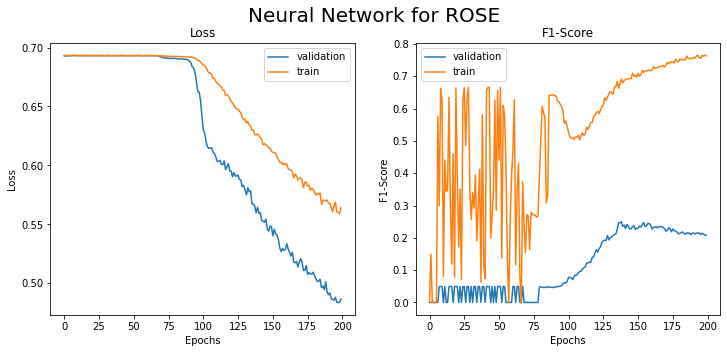

In [321]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(history_rose.history['val_loss'])
ax[0].plot(history_rose.history['loss'])
ax[0].legend(['validation', 'train'])
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history_rose.history['val_f1_m'])
ax[1].plot(history_rose.history['f1_m'])
ax[1].legend(['validation', 'train'])
ax[1].set_title("F1-Score")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("F1-Score")

fig.suptitle('Neural Network for ROSE', fontsize=20)
plt.show()

In [322]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.00001)
    
# model
model_smote = tf.keras.Sequential()
model_smote.add(tf.keras.layers.Dense(4, input_shape=(12,), activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_smote.add(tf.keras.layers.Dropout(0.2))

model_smote.add(tf.keras.layers.Dense(8, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_smote.add(tf.keras.layers.Dropout(0.2))

model_smote.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_smote.summary()

model_smote.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_m])

history_smote = model_smote.fit(X_rose, Y_rose, 
                    validation_data=(X_test, Y_test),
                    batch_size=128,
                    epochs=200)


print("\n\n\t\tNeural Network for SMOTE")

y_pred = model_smote.predict(X_test)
y_pred = y_pred.round().astype('int64')

f1_scores['Neural Network SMOTE'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 4)                 52        
_________________________________________________________________
dropout_48 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_73 (Dense)             (None, 8)                 40        
_________________________________________________________________
dropout_49 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 9         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
72/72 [==============================] - 1s 3ms/step - loss: 0.6906 - f1_m: 0.0135 - val_loss: 0.6818 - val_f

72/72 [==============================] - 0s 1ms/step - loss: 0.6208 - f1_m: 0.6976 - val_loss: 0.5231 - val_f1_m: 0.2648
Epoch 55/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6158 - f1_m: 0.7048 - val_loss: 0.5164 - val_f1_m: 0.2661
Epoch 56/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6175 - f1_m: 0.6983 - val_loss: 0.5198 - val_f1_m: 0.2523
Epoch 57/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6145 - f1_m: 0.7044 - val_loss: 0.5165 - val_f1_m: 0.2523
Epoch 58/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6135 - f1_m: 0.7022 - val_loss: 0.5127 - val_f1_m: 0.2523
Epoch 59/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6106 - f1_m: 0.7044 - val_loss: 0.5086 - val_f1_m: 0.2531
Epoch 60/200
72/72 [==============================] - 0s 1ms/step - loss: 0.6106 - f1_m: 0.7096 - val_loss: 0.5061 - val_f1_m: 0.2488
Epoch 61/200
72/72 [==============================] - 0s 1ms/step - loss: 0

72/72 [==============================] - 0s 1ms/step - loss: 0.5337 - f1_m: 0.7921 - val_loss: 0.4081 - val_f1_m: 0.2261
Epoch 116/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5344 - f1_m: 0.7929 - val_loss: 0.4079 - val_f1_m: 0.2243
Epoch 117/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5315 - f1_m: 0.7953 - val_loss: 0.3986 - val_f1_m: 0.2356
Epoch 118/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5330 - f1_m: 0.7927 - val_loss: 0.3966 - val_f1_m: 0.2350
Epoch 119/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5280 - f1_m: 0.7995 - val_loss: 0.3964 - val_f1_m: 0.2325
Epoch 120/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5289 - f1_m: 0.7957 - val_loss: 0.3961 - val_f1_m: 0.2302
Epoch 121/200
72/72 [==============================] - 0s 1ms/step - loss: 0.5292 - f1_m: 0.8012 - val_loss: 0.3994 - val_f1_m: 0.2255
Epoch 122/200
72/72 [==============================] - 0s 1ms/step - 

Epoch 176/200
72/72 [==============================] - 0s 1ms/step - loss: 0.4902 - f1_m: 0.8079 - val_loss: 0.3448 - val_f1_m: 0.2241
Epoch 177/200
72/72 [==============================] - 0s 1ms/step - loss: 0.4840 - f1_m: 0.8121 - val_loss: 0.3428 - val_f1_m: 0.2253
Epoch 178/200
72/72 [==============================] - 0s 1ms/step - loss: 0.4831 - f1_m: 0.8147 - val_loss: 0.3386 - val_f1_m: 0.2268
Epoch 179/200
72/72 [==============================] - 0s 1ms/step - loss: 0.4805 - f1_m: 0.8134 - val_loss: 0.3410 - val_f1_m: 0.2258
Epoch 180/200
72/72 [==============================] - 0s 1ms/step - loss: 0.4848 - f1_m: 0.8104 - val_loss: 0.3405 - val_f1_m: 0.2258
Epoch 181/200
72/72 [==============================] - 0s 1ms/step - loss: 0.4851 - f1_m: 0.8139 - val_loss: 0.3371 - val_f1_m: 0.2263
Epoch 182/200
72/72 [==============================] - 0s 1ms/step - loss: 0.4778 - f1_m: 0.8178 - val_loss: 0.3379 - val_f1_m: 0.2258
Epoch 183/200
72/72 [==============================] - 

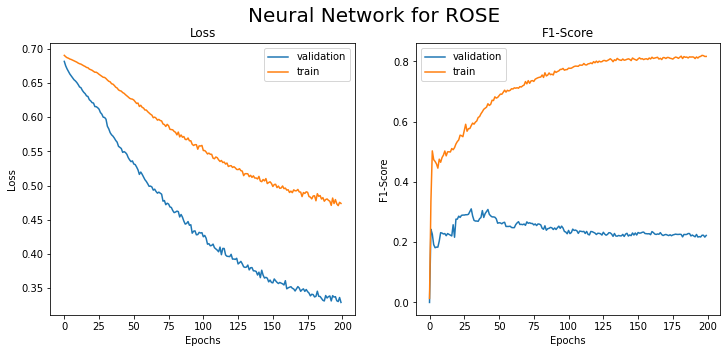

In [323]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(history_smote.history['val_loss'])
ax[0].plot(history_smote.history['loss'])
ax[0].legend(['validation', 'train'])
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history_smote.history['val_f1_m'])
ax[1].plot(history_smote.history['f1_m'])
ax[1].legend(['validation', 'train'])
ax[1].set_title("F1-Score")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("F1-Score")

fig.suptitle('Neural Network for ROSE', fontsize=20)
plt.show()

# 3. Weights

### Komentarz:

Możemy definiować "customowe" wagi dla każdej klasy, które są wykorzystywane następnie przy obliczaniu funkcji kosztu.

In [324]:
cl_weights = {0: 1, 1: 10}

W ten sposób nakładamy na nasz algorytm 10-krotnie większą odpowiedzialność, gdy źle zaklasyfikuje obserwację z klasy 1.

### * Random Forest

In [325]:
print("\t\tRANDOM FOREST WITH CUSTOM WEIGHTS")

rf_weights = RandomForestClassifier(n_estimators=500, criterion='entropy', class_weight=cl_weights, max_depth=6, random_state=35)
rf_weights.fit(X_train, Y_train)

y_pred = rf_weights.predict(X_test)
f1_scores['Random Forest with weights'] = f1_score(Y_tfunkcest, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		RANDOM FOREST WITH CUSTOM WEIGHTS
------------------------------------------------------------
CONFUSION MATRIX:
 [[1924   70]
 [  26   26]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1994
           1       0.27      0.50      0.35        52

    accuracy                           0.95      2046
   macro avg       0.63      0.73      0.66      2046
weighted avg       0.97      0.95      0.96      2046



### * SVM

In [326]:
print("\t\tSVM FOR CUSTOM WEIGHTS")

cl_weights = {0: 1, 1: 6}
clf_weights = svm.SVC(kernel=kernel_functions[0], class_weight=cl_weights) # Linear Kernel
clf_weights.fit(X_train, Y_train)

y_pred = clf_weights.predict(X_test)
f1_scores['SVM with weights'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

		SVM FOR CUSTOM WEIGHTS
------------------------------------------------------------
CONFUSION MATRIX:
 [[1941   53]
 [  27   25]] 

------------------------------------------------------------
OTHER METRICS:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1994
           1       0.32      0.48      0.38        52

    accuracy                           0.96      2046
   macro avg       0.65      0.73      0.68      2046
weighted avg       0.97      0.96      0.96      2046



### * Neural Network

In [327]:
cl_weights = {0: 1, 1: 20}

opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.00001)
    
# model
model_weights = tf.keras.Sequential()
model_weights.add(tf.keras.layers.Dense(8, input_shape=(12,), activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_weights.add(tf.keras.layers.Dropout(0.2))

model_weights.add(tf.keras.layers.Dense(16, activity_regularizer=regularizers.L2(0.00001), activation='relu'))
model_weights.add(tf.keras.layers.Dropout(0.2))

model_weights.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_weights.summary()

model_weights.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_m])

history_weights = model_weights.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test),
                    batch_size=128,
                    epochs=250,
                    class_weight=cl_weights)


print("\n\n\t\tNeural Network for Custom Weights")

y_pred = model_weights.predict(X_test)
y_pred = y_pred.round().astype('int64')

f1_scores['Neural Network with weights'] = f1_score(Y_test, y_pred)
print(60 * "-" + "\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, y_pred), '\n')
print(60 * "-" + "\nOTHER METRICS:\n", classification_report(Y_test, y_pred))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 8)                 104       
_________________________________________________________________
dropout_50 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_76 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_51 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 17        
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
38/38 [==============================] - 1s 5ms/step - loss: 1.1620 - f1_m: 0.0653 - val_loss: 0.6153 - val_f

38/38 [==============================] - 0s 2ms/step - loss: 1.1094 - f1_m: 0.0984 - val_loss: 0.5624 - val_f1_m: 0.0000e+00
Epoch 54/250
38/38 [==============================] - 0s 2ms/step - loss: 1.1052 - f1_m: 0.0685 - val_loss: 0.5644 - val_f1_m: 0.0000e+00
Epoch 55/250
38/38 [==============================] - 0s 2ms/step - loss: 1.1134 - f1_m: 0.0835 - val_loss: 0.5623 - val_f1_m: 0.0000e+00
Epoch 56/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0972 - f1_m: 0.1174 - val_loss: 0.5603 - val_f1_m: 0.0000e+00
Epoch 57/250
38/38 [==============================] - 0s 2ms/step - loss: 1.1059 - f1_m: 0.0710 - val_loss: 0.5610 - val_f1_m: 0.0250
Epoch 58/250
38/38 [==============================] - 0s 2ms/step - loss: 1.1160 - f1_m: 0.0553 - val_loss: 0.5564 - val_f1_m: 0.0000e+00
Epoch 59/250
38/38 [==============================] - 0s 2ms/step - loss: 1.1089 - f1_m: 0.0765 - val_loss: 0.5592 - val_f1_m: 0.0250
Epoch 60/250
38/38 [==============================] - 0

Epoch 114/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0792 - f1_m: 0.1218 - val_loss: 0.5416 - val_f1_m: 0.2164
Epoch 115/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0683 - f1_m: 0.1199 - val_loss: 0.5461 - val_f1_m: 0.2004
Epoch 116/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0614 - f1_m: 0.1245 - val_loss: 0.5392 - val_f1_m: 0.2164
Epoch 117/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0658 - f1_m: 0.1254 - val_loss: 0.5412 - val_f1_m: 0.2004
Epoch 118/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0763 - f1_m: 0.1046 - val_loss: 0.5399 - val_f1_m: 0.2021
Epoch 119/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0674 - f1_m: 0.1276 - val_loss: 0.5355 - val_f1_m: 0.2164
Epoch 120/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0592 - f1_m: 0.1590 - val_loss: 0.5332 - val_f1_m: 0.2198
Epoch 121/250
38/38 [==============================] - 

Epoch 175/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0013 - f1_m: 0.1979 - val_loss: 0.5139 - val_f1_m: 0.2911
Epoch 176/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0135 - f1_m: 0.1776 - val_loss: 0.5167 - val_f1_m: 0.2854
Epoch 177/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9947 - f1_m: 0.1756 - val_loss: 0.5180 - val_f1_m: 0.2732
Epoch 178/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0142 - f1_m: 0.1568 - val_loss: 0.5142 - val_f1_m: 0.2831
Epoch 179/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0136 - f1_m: 0.1641 - val_loss: 0.5135 - val_f1_m: 0.2817
Epoch 180/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0107 - f1_m: 0.1543 - val_loss: 0.5147 - val_f1_m: 0.2712
Epoch 181/250
38/38 [==============================] - 0s 2ms/step - loss: 1.0055 - f1_m: 0.1823 - val_loss: 0.5034 - val_f1_m: 0.3007
Epoch 182/250
38/38 [==============================] - 

Epoch 236/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9591 - f1_m: 0.1736 - val_loss: 0.4791 - val_f1_m: 0.2647
Epoch 237/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9586 - f1_m: 0.1676 - val_loss: 0.4742 - val_f1_m: 0.2746
Epoch 238/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9594 - f1_m: 0.1586 - val_loss: 0.4745 - val_f1_m: 0.2693
Epoch 239/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9373 - f1_m: 0.1855 - val_loss: 0.4695 - val_f1_m: 0.2695
Epoch 240/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9619 - f1_m: 0.1824 - val_loss: 0.4725 - val_f1_m: 0.2702
Epoch 241/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9325 - f1_m: 0.2204 - val_loss: 0.4707 - val_f1_m: 0.2722
Epoch 242/250
38/38 [==============================] - 0s 2ms/step - loss: 0.9438 - f1_m: 0.1720 - val_loss: 0.4684 - val_f1_m: 0.2759
Epoch 243/250
38/38 [==============================] - 

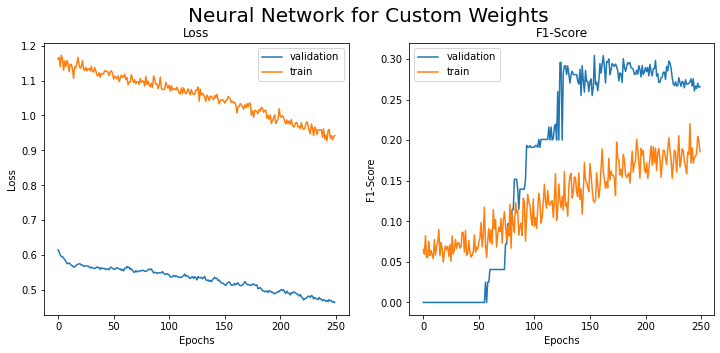

In [328]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(history_weights.history['val_loss'])
ax[0].plot(history_weights.history['loss'])
ax[0].legend(['validation', 'train'])
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

ax[1].plot(history_weights.history['val_f1_m'])
ax[1].plot(history_weights.history['f1_m'])
ax[1].legend(['validation', 'train'])
ax[1].set_title("F1-Score")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("F1-Score")

fig.suptitle('Neural Network for Custom Weights', fontsize=20)
plt.show()

# Compare Performance of Algorithms

In [335]:
pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1-Score']).sort_values('F1-Score')

,F1-Score
Neural Network ROSE,0.216216
Neural Network SMOTE,0.230563
SVM ROSE,0.250000
SVM SMOTE,0.250000
Random Forest SMOTE,0.273684
Neural Network with weights,0.276923
Random Forest ROSE,0.316667
Random Forest with weights,0.351351
SVM with weights,0.384615


# Podsumowanie

Biorąc pod uwagę powyższą analizę, nakreśliłem wstępny pipeline projektu:

1. Data preprocessing

    a) Opis próby normalizacji danych oraz co z tej normalizacji wynikło (zlokalizowano kolumny z wartościami bezwzględnymi)
    
    b) Selekcja cech - tutaj poczytałbym szczegółowo o każdym ze wskaźników, a potem wybrałbym podzbiór najistotniejszych z nich z punktu widzenia predykcji czy firma zbankrutuje (oczywiście ze szczegółowym uzasadnieniem zawartym w samej pracy)
    
    
2. Porównanie trzech metod stosowanych przy uczeniu maszynowym na zbiorach niezbalansowanych

    a) ROSE (Random Oversamling)
    
    b) SMOTE
    
    c) Wagi dla klas przy obliczaniu funkcji kosztu

Wyniki, które pokazałem w ostatniej tabeli, co prawda nie robią może dużego wrażenia, natomiast w moim przeczuciu mają spory potencjał do poprawy ze względu na możliwość eksperymentowania z:
* selekcją cech,
* doborem hyperparametrów w algorytmach ML,
* architekturą sieci neuronowych,
* funkcją jądra w SVM

### Proponowany temat pracy inżynierskiej:

# Porównanie metod ROSE, SMOTE i wag klasowych dla klasyfikacji binarnej na przykładzie niezbalansowanego zbioru danych dot. bankructw Tajwańskich spółek w okresie 1999-2009